Hello, we are going to practice some Data Science questions:
1. Data Cleaning and Preprocessing (Python Example)
2. Exploratory Data Analysis (EDA)
3. Statistical Analysis (Hypothesis Testing)
4. Machine Learning (Modeling)

We're going to do an example problem for each of the following topics.

**Problem 1:**

You are given a dataset of customer transactions with missing values, duplicates, and categorical variables. Here's a basic scenario:

Problem: You have a DataFrame with columns CustomerID, TransactionDate, AmountSpent, and ProductCategory. Some values in AmountSpent are missing, and ProductCategory is in string format, but some values are misspelled. There are also some duplicate rows.

**Tasks:**

Remove duplicate rows.
Fill missing values in AmountSpent with the median.
Correct the misspelled values in ProductCategory.

In [39]:
#1.

import pandas as pd
import numpy as np

# Simulate a dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 2, 6],
    'TransactionDate': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-02', '2024-01-06'],
    'AmountSpent': [100, np.nan, 150, 200, np.nan, 150, 180],
    'ProductCategory': ['Electronics', 'Electronics', 'Furniiture', 'Clothing', 'Clothing', 'Furniiture', 'Electronics']
}

# Create DataFrame
df = pd.DataFrame(data)

# Show initial data
print("Initial Data:")
print(df)

# 1. Remove duplicate rows
df = df.drop_duplicates()

# 2. Fill missing values in 'AmountSpent' with the median
median_amount = df['AmountSpent'].median()
df['AmountSpent'] = df['AmountSpent'].fillna(median_amount)

# 3. Correct the misspelled values in 'ProductCategory'
df['ProductCategory'] = df['ProductCategory'].replace({'Furniiture': 'Furniture'})

# Show the cleaned data
print("\nCleaned Data:")
print(df)

Initial Data:
   CustomerID TransactionDate  AmountSpent ProductCategory
0           1      2024-01-01        100.0     Electronics
1           2      2024-01-02          NaN     Electronics
2           3      2024-01-03        150.0      Furniiture
3           4      2024-01-04        200.0        Clothing
4           5      2024-01-05          NaN        Clothing
5           2      2024-01-02        150.0      Furniiture
6           6      2024-01-06        180.0     Electronics

Cleaned Data:
   CustomerID TransactionDate  AmountSpent ProductCategory
0           1      2024-01-01        100.0     Electronics
1           2      2024-01-02        150.0     Electronics
2           3      2024-01-03        150.0       Furniture
3           4      2024-01-04        200.0        Clothing
4           5      2024-01-05        150.0        Clothing
5           2      2024-01-02        150.0       Furniture
6           6      2024-01-06        180.0     Electronics


**Explanation:**

Remove duplicates: The drop_duplicates() method removes rows that are identical.

Fill missing values: The fillna() method fills the missing values in the AmountSpent column with the median of that column.

Correct misspelled values: We use the replace() method to correct the misspelled "Furniiture" to "Furniture".

**Problem 2:**

Imagine you have a dataset of housing prices with columns Price, Size, Location, and YearBuilt.

Problem: You want to explore the relationship between Price and Size, and see if Location has any significant impact on the Price.

**Tasks:**

Create a scatter plot to visualize the relationship between Price and Size.

Create box plots to compare Price across different locations.

Interpret the trends you observe.

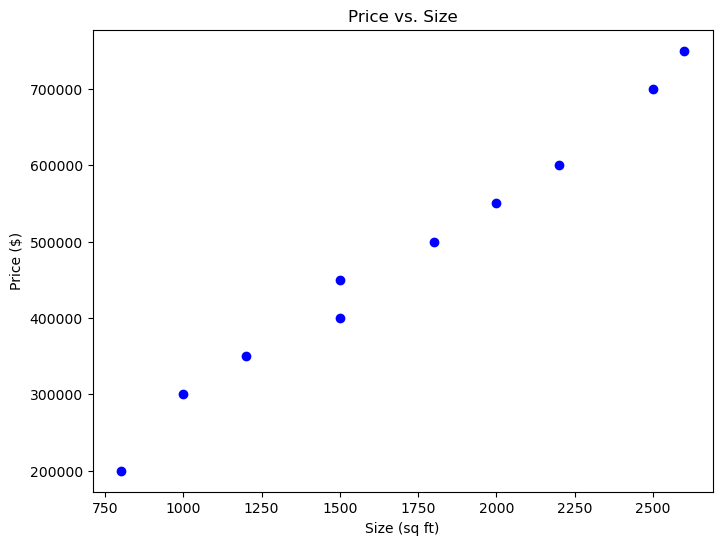

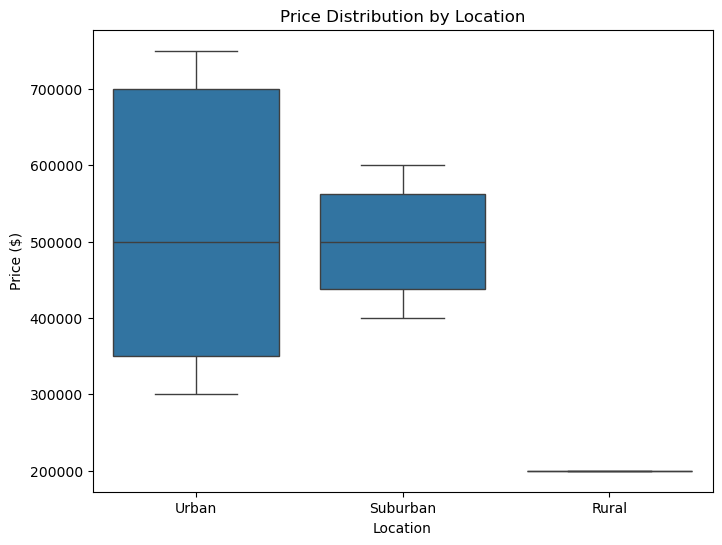

In [43]:
#2.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a dataset
data = {
    'Price': [300000, 450000, 500000, 350000, 600000, 550000, 200000, 700000, 750000, 400000],
    'Size': [1000, 1500, 1800, 1200, 2200, 2000, 800, 2500, 2600, 1500],
    'Location': ['Urban', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Suburban', 'Rural', 'Urban', 'Urban', 'Suburban'],
    'YearBuilt': [2000, 2005, 2010, 1995, 2015, 2018, 1990, 2020, 2022, 2000]
}

# Create DataFrame
df = pd.DataFrame(data)

# 1. Visualize the relationship between 'Price' and 'Size' (Scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['Size'], df['Price'], color='blue')
plt.title('Price vs. Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.show()

# 2. Visualize the distribution of 'Price' by 'Location' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price ($)')
plt.show()



**Explanation:**

Scatter plot (Price vs. Size):

We use a scatter plot to visualize the relationship between the Price and Size of the houses. The x-axis represents Size (square feet), and the y-axis represents Price (in dollars). By plotting these two variables, we can visually inspect if there is a trend (e.g., whether larger houses tend to be more expensive).

Box plot (Price by Location):

A box plot is useful for comparing the distribution of Price across different categories. In this case, we are comparing Price for each Location. It will help us understand whether location has a significant impact on house prices. For instance, do houses in "Urban" areas tend to have higher prices compared to "Suburban" or "Rural"?

Output:
The scatter plot shows a positive (pretty much linear) trend between Size and Price, indicating larger houses are typically more expensive. The box plot shows the price distribution for each location, which will help you see if there are significant differences in prices by location.

Interpretation:

Scatter plot: If there's an upward trend in the scatter plot (as size increases, price increases), this suggests that larger houses tend to be more expensive. If the points are scattered randomly, there might not be a clear relationship.

Box plot: If the "Urban" location has higher median prices with a wider range, this suggests that urban areas generally have more expensive houses than suburban or rural areas.

**Problem 3:**

You're working with a dataset of employee salaries, and you want to know if the average salary for employees in the "Tech" department is different from that of employees in the "Sales" department.

Steps to Solve:

Formulate Hypotheses:

Null Hypothesis (H₀): There is no difference in average salaries between the Tech and Sales departments (i.e., the means are equal).

Alternative Hypothesis (H₁): There is a difference in average salaries between the Tech and Sales departments (i.e., the means are not equal).

Perform a t-test to compare the average salaries of the two departments.

Interpret the results: Based on the p-value, decide whether to reject the null hypothesis.



In [47]:
import pandas as pd
import numpy as np
from scipy import stats

# Simulated data
data = {
    'Department': ['Tech', 'Tech', 'Tech', 'Tech', 'Tech', 'Sales', 'Sales', 'Sales', 'Sales', 'Sales'],
    'Salary': [80000, 90000, 95000, 100000, 110000, 55000, 60000, 65000, 70000, 75000]
}

# Create DataFrame
df = pd.DataFrame(data)

print(df)
print("\n")

# Separate salaries by department
tech_salaries = df[df['Department'] == 'Tech']['Salary']
sales_salaries = df[df['Department'] == 'Sales']['Salary']

#print(tech_salaries)

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(tech_salaries, sales_salaries)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in salaries between Tech and Sales.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in salaries between Tech and Sales.")


  Department  Salary
0       Tech   80000
1       Tech   90000
2       Tech   95000
3       Tech  100000
4       Tech  110000
5      Sales   55000
6      Sales   60000
7      Sales   65000
8      Sales   70000
9      Sales   75000


T-statistic: 4.898979485566357
P-value: 0.0011953106743925372
Reject the null hypothesis: There is a significant difference in salaries between Tech and Sales.


**Explanation:**

Simulated Data: We create a simple dataset with two departments: "Tech" and "Sales". The Salary column contains the salaries of employees in each department.

Hypothesis Test:

We use a two-sample t-test (independent samples) to compare the means of the salaries in the two departments. This test assumes that the two samples are independent and that the salaries are normally distributed.

The t-statistic tells us how much the means of the two samples differ relative to the variability of the data.

The p-value helps us determine the statistical significance of the result. If the p-value is below a chosen significance level (typically 0.05), we reject the null hypothesis.
Interpretation:

If the p-value is small (less than 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in salaries between the two departments.

If the p-value is large, we fail to reject the null hypothesis and conclude that there is no significant difference in salaries between the two departments.

**Problem 4:**
You are given a dataset with customer features such as Age, Income, Gender, and PreviousPurchases, and you are tasked with predicting whether a customer will make a purchase (Purchase = 1, NoPurchase = 0).

Steps to Solve:

1. Preprocess the data: Handle categorical variables (like Gender), scale numerical features (like Age and Income), and split the data into training and testing sets.

2. Train a classification model: We'll use logistic regression (as an example) to train the model to predict whether a customer will make a purchase.

3. Evaluate the model: Evaluate the model using metrics like accuracy, precision, recall, and F1-score.

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated customer dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [50000, 60000, 55000, 70000, 80000, 65000, 75000, 90000, 95000, 100000],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'PreviousPurchases': [1, 2, 0, 1, 3, 2, 1, 0, 2, 3],
    'Purchase': [1, 1, 0, 0, 1, 1, 0, 0, 1, 0]  # Target variable: 1 = Purchase, 0 = No Purchase
}

# Create DataFrame
df = pd.DataFrame(data)

print("Look at the dataframe: \n")
print(df)
print("\n")

# 1. Preprocess the data
# Handle categorical variable 'Gender' (convert to numeric using one-hot encoding)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Features (X) and target (y)
X = df.drop('Purchase', axis=1)  # Drop target column
y = df['Purchase']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train[['Age', 'Income', 'PreviousPurchases']] = scaler.fit_transform(X_train[['Age', 'Income', 'PreviousPurchases']])
X_test[['Age', 'Income', 'PreviousPurchases']] = scaler.transform(X_test[['Age', 'Income', 'PreviousPurchases']])

# 2. Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Look at the dataframe: 

   Age  Income  Gender  PreviousPurchases  Purchase
0   25   50000    Male                  1         1
1   30   60000  Female                  2         1
2   35   55000  Female                  0         0
3   40   70000    Male                  1         0
4   45   80000    Male                  3         1
5   50   65000  Female                  2         1
6   55   75000    Male                  1         0
7   60   90000  Female                  0         0
8   65   95000    Male                  2         1
9   70  100000  Female                  3         0


Accuracy: 0.5
Precision: 1.0
Recall: 0.5
F1-Score: 0.6666666666666666


**Explanation:**
1. Data Preprocessing:

* Handle categorical variables: We use pd.get_dummies() to convert the Gender column into numerical form, using one-hot encoding. This means the "Female" category is turned into a binary feature Gender_Female (1 if Female, 0 if Male).

* Scaling the numerical features: We use StandardScaler() to standardize the numerical features (Age, Income, and PreviousPurchases) to have a mean of 0 and a standard deviation of 1. This helps models like logistic regression perform better, as they are sensitive to feature scaling.

* Splitting the data: We use train_test_split() to split the data into 80% training data and 20% test data.

2. Training the Model:

We use Logistic Regression, a popular algorithm for binary classification tasks. It predicts the probability of a given input belonging to a particular class (in this case, whether the customer will make a purchase or not).

3. Making Predictions:

After training the model, we use it to predict the target variable (Purchase) on the test data.

4. Evaluating the Model:

 We evaluate the model using several metrics:

* Accuracy: The proportion of correct predictions (both purchases and no purchases).

* Precision: The proportion of true positives (customers who were predicted to purchase and actually did).

Recall: The proportion of actual positives that were correctly identified (how many customers who actually purchased were correctly predicted).

* F1-Score: The harmonic mean of precision and recall, providing a balanced measure when the dataset is imbalanced.

**Output:**

* Accuracy tells you how often the model is correct.
* Precision tells you how many of the predicted purchases were actually purchases.
* Recall tells you how many of the actual purchases were correctly predicted by the model.
* F1-Score is the balance between precision and recall, and it's useful when you care equally about both false positives and false negatives.

Next Steps:

If the model's performance is not satisfactory, you could:

Try different classification models (e.g., Decision Trees, Random Forest, SVM).

Tune hyperparameters (e.g., regularization for logistic regression).

Handle imbalanced classes (if the number of purchases and no-purchases is very skewed).